#### Firstly lets try using command line to run train.py and test.py

In [3]:
models = ['rf', 'nn', 'cnn']
for model in models:
    %run ../src/train.py --alg $model

2025-02-14 18:12:50 - root - INFO - Model: rf training
2025-02-14 18:13:15 - root - INFO - Training Time: 23.5588718 seconds
2025-02-14 18:13:15 - root - INFO - Train Accuracy: 1.0
2025-02-14 18:13:15 - root - INFO - Test Accuracy: 0.9704
2025-02-14 18:13:15 - root - INFO - ----------------------------------------
2025-02-14 18:13:16 - root - INFO - Model: nn training
2025-02-14 18:13:19 - root - INFO - Epoch 1/10, Loss: 0.28874823227574425, Accuracy: 0.9156333333333333
2025-02-14 18:13:21 - root - INFO - Epoch 2/10, Loss: 0.11944607289930184, Accuracy: 0.9643666666666667
2025-02-14 18:13:24 - root - INFO - Epoch 3/10, Loss: 0.08308329180702567, Accuracy: 0.9740333333333333
2025-02-14 18:13:27 - root - INFO - Epoch 4/10, Loss: 0.06252858397457749, Accuracy: 0.9802333333333333
2025-02-14 18:13:29 - root - INFO - Epoch 5/10, Loss: 0.04780649149984432, Accuracy: 0.9842166666666666
2025-02-14 18:13:32 - root - INFO - Epoch 6/10, Loss: 0.04048804194146457, Accuracy: 0.98665
2025-02-14 18:13

In [ ]:
for model in models:
    %run ../src/inference.py --alg $model

2025-02-14 18:15:24 - root - INFO - Model: rf loading
2025-02-14 18:15:25 - root - INFO - Making predictions
2025-02-14 18:15:26 - root - INFO - Train Accuracy: 1.0
2025-02-14 18:15:26 - root - INFO - Test Accuracy: 0.9704
2025-02-14 18:15:26 - root - INFO - ----------------------------------------
2025-02-14 18:15:27 - root - INFO - Model: nn loading
2025-02-14 18:15:27 - root - INFO - Making predictions
2025-02-14 18:15:27 - root - INFO - Train Accuracy: 0.9957
2025-02-14 18:15:27 - root - INFO - Test Accuracy: 0.9796
2025-02-14 18:15:27 - root - INFO - ----------------------------------------
2025-02-14 18:15:27 - root - INFO - Model: cnn loading
2025-02-14 18:15:27 - root - INFO - Making predictions
2025-02-14 18:15:28 - root - INFO - Train Accuracy: 0.9980166666666667
2025-02-14 18:15:28 - root - INFO - Test Accuracy: 0.9912
2025-02-14 18:15:28 - root - INFO - ----------------------------------------


As we can see all algorithms are working fine and we can use them for training and testing on MNIST dataset.  

CNN gives the best accuracy of `0.9912` on test dataset, but takes a bit more time to train, next goes NN with accuracy of `0.9796` and Random Forest with accuracy of `0.9704`.  

Times for training are `23.56s` for Random Forest, `26.95s` for NN and `28.7s` for CNN.

As was written in the task, I used Random Forest, Feed-Forward Neural Network and Convolutional Neural Network for training and testing on MNIST dataset.  

Random Forest was implemented using sklearn library, Feed-Forward Neural Network and Convolutional Neural Network were implemented using PyTorch library.  

You can find the code with models in the classifier.py file.  

I used default parameters for all models.

#### Or we could run it explicitly without using train.py and inference.py
##### Let's try with prediction

In [6]:
import sys
sys.path.append("..") 
sys.path.append("../src") 
# Adds higher level directories to path (temporarily) to access our modules
import os
from dotenv import load_dotenv
import numpy as np
from src.utils import load_mnist_data, set_seed, get_accuracy
from src.clasifiers import load_model


# Load constants from .env file
load_dotenv()
SEED = int(os.getenv('SEED'))
MODEL_LOCAL_PATH = os.getenv('MODEL_LOCAL_PATH')
LOCAL_DATASET_PATH = os.getenv('LOCAL_DATASET_PATH')
CONFIG_DIR = os.getenv('CONFIG_DIR')
LOGGING_LEVEL = os.getenv('LOGGING_LEVEL')
LOGGING_FORMAT = os.getenv('LOGGING_FORMAT')
LOGGING_DATE_FORMAT = os.getenv('LOGGING_DATE_FORMAT')


# Set seed for reproducibility
set_seed(SEED)

# Load data
X_train, X_test, y_train, y_test = load_mnist_data(LOCAL_DATASET_PATH)

In [13]:
# Load models and predict
clf_rf = load_model(os.path.join(MODEL_LOCAL_PATH, 'rf.pkl'))
y_pred_train_rf = clf_rf.predict(X_train)
y_pred_test_rf = clf_rf.predict(X_test)

clf_nn = load_model(os.path.join(MODEL_LOCAL_PATH, 'nn.pkl'))
y_pred_train_nn = clf_nn.predict(X_train)
y_pred_test_nn = clf_nn.predict(X_test)

clf_cnn = load_model(os.path.join(MODEL_LOCAL_PATH, 'cnn.pkl'))
y_pred_train_cnn = clf_cnn.predict(X_train)
y_pred_test_cnn = clf_cnn.predict(X_test)

In [17]:
# Calculate accuracy
train_accuracy_rf = get_accuracy(y_train, y_pred_train_rf)
test_accuracy_rf = get_accuracy(y_test, y_pred_test_rf)
test_accuracy_nn = get_accuracy(y_test, y_pred_test_nn)
train_accuracy_nn = get_accuracy(y_train, y_pred_train_nn)
test_accuracy_cnn = get_accuracy(y_test, y_pred_test_cnn)
train_accuracy_cnn = get_accuracy(y_train, y_pred_train_cnn)
print(f'Train accuracy rf: {train_accuracy_rf}, Test accuracy rf: {test_accuracy_rf}')
print(f'Train accuracy nn: {train_accuracy_nn}, Test accuracy nn: {test_accuracy_nn}')
print(f'Train accuracy cnn: {train_accuracy_cnn}, Test accuracy cnn: {test_accuracy_cnn}')

Train accuracy rf: 1.0, Test accuracy rf: 0.9704
Train accuracy nn: 0.9957, Test accuracy nn: 0.9796
Train accuracy cnn: 0.9980166666666667, Test accuracy cnn: 0.9912


As we can see this output and the output of inference.py are same, so all works fine.

#### Lets show some incorrect predictions, because despite the high accuracy of the models, there are still some incorrect predictions.

In [ ]:
# indices of the incorrect predictions
incorrect_idx_rf = np.where(y_test != y_pred_test_rf)[0]
incorrect_idx_nn = np.where(y_test != y_pred_test_nn)[0]
incorrect_idx_cnn = np.where(y_test != y_pred_test_cnn)[0]

Random Forest


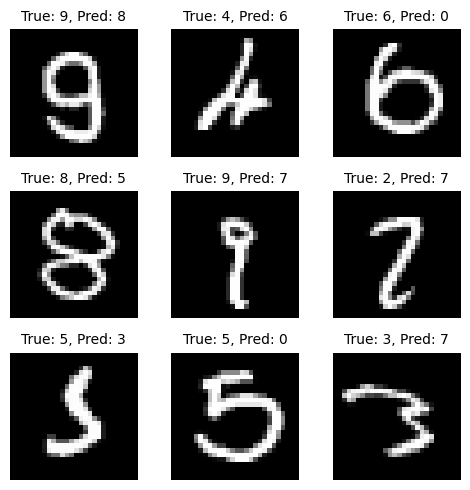

Neural Network


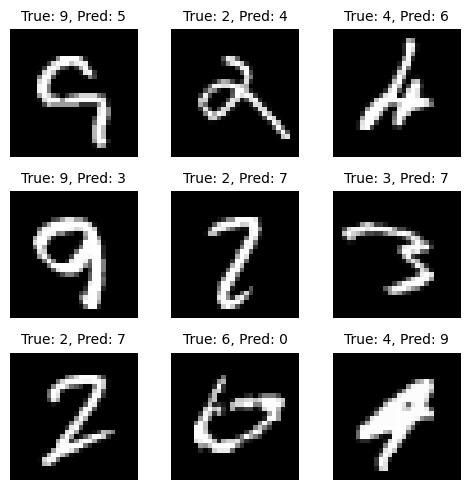

Convolutional Neural Network


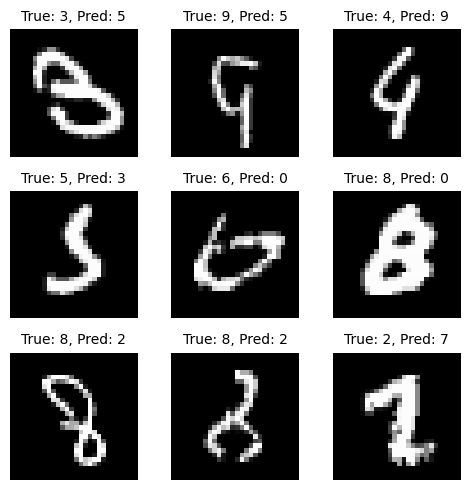

In [ ]:
import matplotlib.pyplot as plt
def plot_by_idxs(idxs, y_true, y_pred, X, title=''):
    '''Plot images by indices in original X'''
    cols, rows = 3, 3
    print(title)
    plt.figure(figsize=(5, 5))
    for i, idx in enumerate(idxs[:cols * rows]):
        plt.subplot(cols, rows, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_by_idxs(incorrect_idx_rf, y_test, y_pred_test_rf, X_test, 'Random Forest')
plot_by_idxs(incorrect_idx_nn, y_test, y_pred_test_nn, X_test, 'Neural Network')
plot_by_idxs(incorrect_idx_cnn, y_test, y_pred_test_cnn, X_test, 'Convolutional Neural Network')


#### As we can see models are making wrong predictions on mostly hard examples, but in general they are working fine. To improve the accuracy we could try modifying the models, changing hyperparameters, using augmentation, etc.